### **Collecting the Data**


#### *Import necessary Libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### *Set seaborn style for better visualization aesthetics*

In [12]:
sns.set(style="whitegrid")

#### *Load the dataset*

In [4]:
file_path = 'Facebook Metrics of Cosmetic Brand.csv'
df = pd.read_csv(file_path)  # Loading the CSV file into a DataFrame for analysis

#### *1. Inspect the data*

In [11]:
print("------------------First five rows of the dataset:----------------------------------------------")
print(df.head())  # Display the first few rows to get an overview of the dataset structure
print("-----------------------------------------------------------------------------------------------")
print("------------------Last five rows of the dataset:-----------------------------------------------")
print(df.tail())  # Display the last few rows to get an overview of the dataset structure
print("-----------------------------------------------------------------------------------------------")
# A random sample ( n number of random rows)
print("-----------------Random 5 rows  of the dataset:------------------------------------------------")
print(df.sample(n=5) )

------------------First five rows of the dataset:----------------------------------------------
   Unnamed: 0  Page total likes    Type  Category  Post Month  Post Weekday  \
0           0            139441   Photo         2          12             4   
1           1            139441  Status         2          12             3   
2           2            139441   Photo         3          12             3   
3           3            139441   Photo         2          12             2   
4           4            139441   Photo         2          12             2   

   Post Hour  Paid  Lifetime Post Total Reach  \
0          3   0.0                       2752   
1         10   0.0                      10460   
2          3   0.0                       2413   
3         10   1.0                      50128   
4          3   0.0                       7244   

   Lifetime Post Total Impressions  Lifetime Engaged Users  \
0                             5091                     178   
1         

### **Clean the Data**
*Check data, its format, and the types of variables available for analysis and  to check for missing data as it can affect our analysis. Missing values might need to be addressed through cleaning.*

In [16]:
# Inspect the data
#  Rows
print("Number of rows and columns in the data:", df.shape)
# Column names
print("Columns of the data are:", df.columns)
print("First five rows of the dataset:")
print(df.head())  # Display the first few rows to get an overview of the dataset structure

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())  # Identifying if there are any missing values in the dataset

# Data Cleaning: Drop rows with missing values (if any)
df.dropna(inplace=True)  # Dropping rows with missing values

Number of rows and columns in the data: (495, 20)
Columns of the data are: Index(['Unnamed: 0', 'Page total likes', 'Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')
First five rows of the dataset:
   Unnamed: 0  Page total likes    Type  Category  Post Month  Post Weekday  \
0           0            139441   Photo         2          12             4   
1           1            139441  Status         2          12             3   
2           2            139441   Photo         3          12             3   
3        

### **Basic Dataset Summary and Statistics**


In [18]:
print("\nDataset Description:")
print(df.describe())  # Provides summary statistics of the numerical columns


Dataset Description:
       Unnamed: 0  Page total likes    Category  Post Month  Post Weekday  \
count  495.000000        495.000000  495.000000  495.000000    495.000000   
mean   249.963636     123173.268687    1.886869    7.028283      4.133333   
std    144.362730      16203.818031    0.853268    3.304274      2.030735   
min      0.000000      81370.000000    1.000000    1.000000      1.000000   
25%    126.500000     112324.000000    1.000000    4.000000      2.000000   
50%    251.000000     129600.000000    2.000000    7.000000      4.000000   
75%    374.500000     136393.000000    3.000000   10.000000      6.000000   
max    498.000000     139441.000000    3.000000   12.000000      7.000000   

        Post Hour        Paid  Lifetime Post Total Reach  \
count  495.000000  495.000000                 495.000000   
mean     7.844444    0.280808               14028.101010   
std      4.385064    0.449849               22821.050008   
min      1.000000    0.000000               

### **Exploratory Data Analysis (EDA)**


#### *Post Type Distribution and Engagement Analysis*

In [19]:

# Post Type Distribution(helps us see which type of content (e.g., photos, videos) is most frequently posted. This will allow us to analyze engagement patterns across different types of posts.)
post_type_counts = df['Type'].value_counts()  # Counting the number of posts for each post type (e.g., photo, video)
print("\nPost Type Distribution:")
print(post_type_counts)


# Calculate total interactions for each post type
type_engagement = df.groupby('Type').agg({
    'like': 'sum', 
    'comment': 'sum', 
    'share': 'sum', 
    'Total Interactions': 'sum'
}).reset_index()


# Calculate average interactions for each post type
type_engagement_avg = df.groupby('Type').agg({
    'like': 'mean', 
    'comment': 'mean', 
    'share': 'mean', 
    'Total Interactions': 'mean'
}).reset_index()

print("\nTotal Engagement by Post Type:")
print(type_engagement)

print("\nAverage Engagement by Post Type:")
print(type_engagement_avg)

#By calculating average interactions per post type, we get a better sense of the typical performance of each post type, instead of  just looking at the total number of interactions. This helps us understand which post types tend to perform better




Post Type Distribution:
Type
Photo     421
Status     45
Link       22
Video       7
Name: count, dtype: int64

Total Engagement by Post Type:
     Type     like  comment    share  Total Interactions
0    Link   1613.0       62    284.0                1959
1   Photo  77492.0     3192  11433.0               92117
2  Status   7952.0      401   1414.0                9767
3   Video   1620.0       86    365.0                2071

Average Engagement by Post Type:
     Type        like    comment      share  Total Interactions
0    Link   73.318182   2.818182  12.909091           89.045455
1   Photo  184.066508   7.581948  27.156770          218.805226
2  Status  176.711111   8.911111  31.422222          217.044444
3   Video  231.428571  12.285714  52.142857          295.857143


### **Correlation Analysis**

In [21]:
# Analyze the correlation between key engagement metrics (like, comment, share, and Lifetime Engaged Users)
correlation_matrix = df[['like', 'comment', 'share', 'Lifetime Engaged Users']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                            like   comment     share  Lifetime Engaged Users
like                    1.000000  0.837737  0.904105                0.568608
comment                 0.837737  1.000000  0.868460                0.504954
share                   0.904105  0.868460  1.000000                0.531346
Lifetime Engaged Users  0.568608  0.504954  0.531346                1.000000


### **Paid vs Non-Paid Post Engagement Analysis**

In [22]:
# Group the data by 'Paid' status to analyze how paid (advertised) posts compare with organic (non-paid) posts in terms of engagement

paid_engagement = df.groupby('Paid').agg({
    'like': 'mean', 
    'comment': 'mean', 
    'share': 'mean', 
    'Total Interactions': 'mean'
}).reset_index()

print("\nPaid vs Non-Paid Post Engagement:")
print(paid_engagement)


Paid vs Non-Paid Post Engagement:
   Paid        like    comment      share  Total Interactions
0   0.0  157.084270   6.573034  25.219101          188.876404
1   1.0  235.647482  10.079137  32.503597          278.230216


### **Post Timing Analysis**

#### *Engagement by Weekday*

In [23]:
weekday_engagement = df.groupby('Post Weekday').agg({
    'like': 'mean', 
    'comment': 'mean', 
    'share': 'mean', 
    'Total Interactions': 'mean'
}).reset_index()

print("\nEngagement by Weekday:")
print(weekday_engagement)


Engagement by Weekday:
   Post Weekday        like    comment      share  Total Interactions
0             1  204.338235   7.926471  24.764706          237.029412
1             2  167.212121   6.530303  26.712121          200.454545
2             3  236.640625  13.593750  37.531250          287.765625
3             4  220.549296  10.352113  31.619718          262.521127
4             5  174.484848   6.181818  27.484848          208.151515
5             6  135.937500   5.362500  23.537500          164.837500
6             7  131.887500   4.112500  21.312500          157.312500


#### *Engagement by Hour*

In [24]:
# Analyze engagement metrics by the hour of the day (Post Hour) to find out when posts get the most engagement
hourly_engagement = df.groupby('Post Hour').agg({
    'like': 'mean', 
    'comment': 'mean', 
    'share': 'mean', 
    'Total Interactions': 'mean'
}).reset_index()

print("\nEngagement by Hour of the Day:")
print(hourly_engagement)


Engagement by Hour of the Day:
    Post Hour        like    comment      share  Total Interactions
0           1  146.500000   6.500000  28.000000          181.000000
1           2  155.666667   8.051282  27.384615          191.102564
2           3  192.638095   6.247619  29.704762          228.590476
3           4  138.941176   6.970588  23.617647          169.529412
4           5  569.923077  32.076923  82.307692          684.307692
5           6  141.133333   3.533333  22.466667          167.133333
6           7  127.923077   2.307692  18.230769          148.461538
7           8   79.454545   3.181818  15.818182           98.454545
8           9  117.344828   3.586207  16.689655          137.620690
9          10  214.701299   9.129870  30.103896          253.935065
10         11  117.840909   4.840909  23.522727          146.204545
11         12  151.551724   9.586207  18.344828          179.482759
12         13  203.961538   9.192308  31.865385          245.019231
13         14  2

### **Visualizations**

#### *Bar Plot of Total Interactions by Post Type*

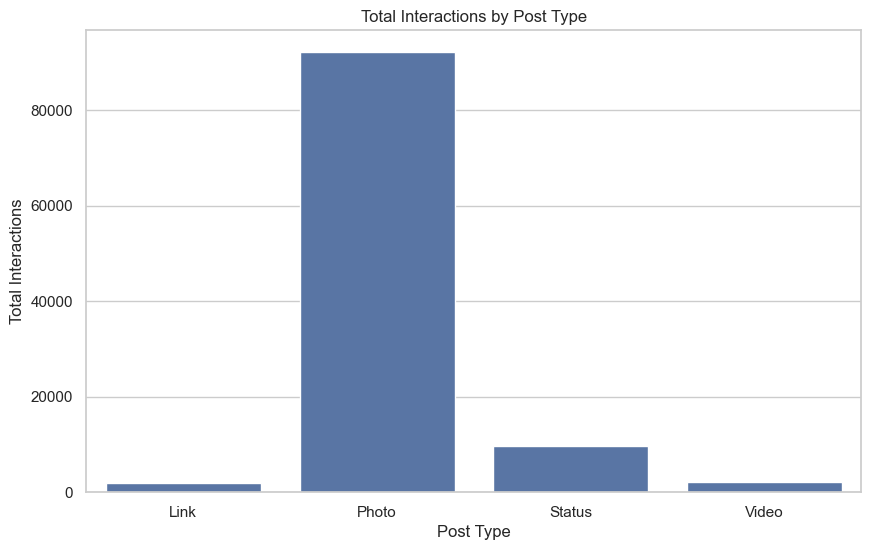

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Total Interactions', data=type_engagement)
plt.title('Total Interactions by Post Type')
plt.ylabel('Total Interactions')
plt.xlabel('Post Type')
plt.show()

#### *Heatmap for Correlation Analysis*

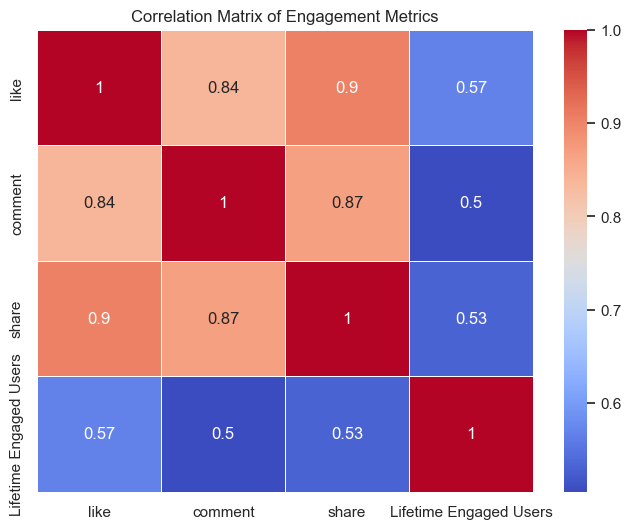

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

#### *Line Plot for Engagement by Weekday*

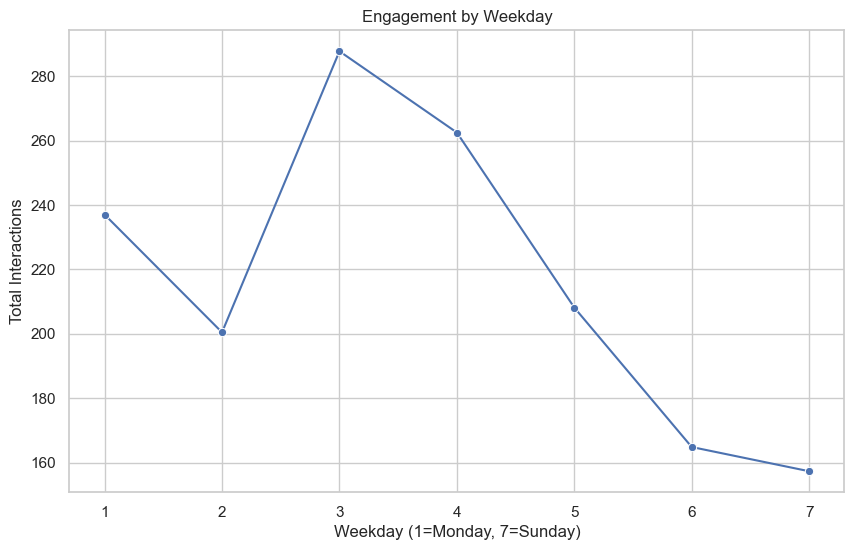

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Post Weekday', y='Total Interactions', data=weekday_engagement, marker='o')
plt.title('Engagement by Weekday')
plt.ylabel('Total Interactions')
plt.xlabel('Weekday (1=Monday, 7=Sunday)')
plt.show()

#### *Line Plot for Engagement by Hour*

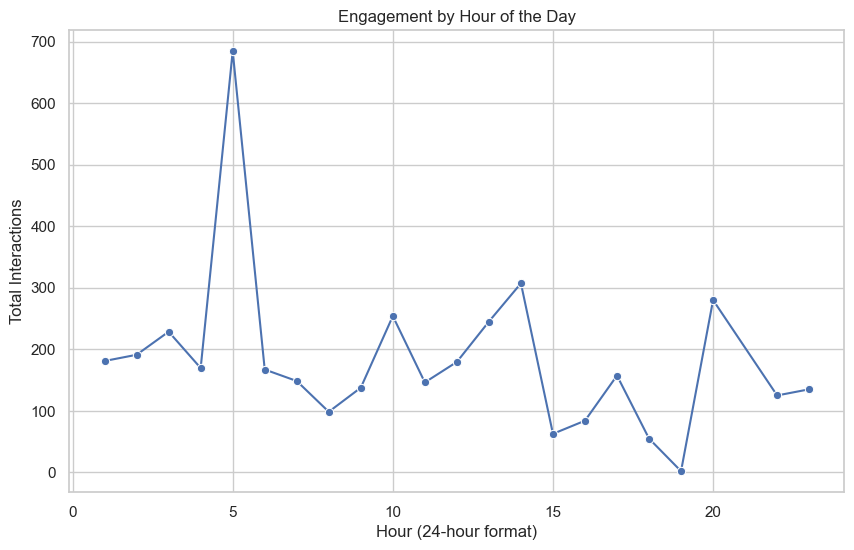

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Post Hour', y='Total Interactions', data=hourly_engagement, marker='o')
plt.title('Engagement by Hour of the Day')
plt.ylabel('Total Interactions')
plt.xlabel('Hour (24-hour format)')
plt.show()

#### *Conclusion*
- Photo posts generate the highest engagement overall, followed by status posts.
- Paid posts result in higher engagement than organic posts.
- Posts made during the early morning (around 5 AM) and on weekdays (especially Wednesday and Thursday) receive higher interactions.
